In [1]:
import pandas as pd
import numpy as np

In [2]:
def format_stars(stars):
    stars = stars.split(', \'')
    stars = [star for star in stars if star != '' and star != '    Stars:\'']
    stars[0] = stars[0][2:]
    stars[-1] = stars[-1][:-2]

    dir_index = -1
    for j in range(len(stars)):
        stars[j] = stars[j].replace(', "', '')
        if 'Stars:\'' in stars[j]:
            stars[j] = stars[j].split(':\'')[1]
        
        if '|' in stars[j]:
            dir_index = j
    
    stars = stars[dir_index + 1:]

    return stars if stars != [] else None

def format_genres(genre):
    genres = genre.split(', ')
    return genres[0] if genres != [] else None

def format_years(year):
    if len(year) < 5 or year[1] not in ['1', '2']:
        return None
    return int(year[1:5])

def set_is_tv(duration):
    duration = int(duration[0: -4])

    if duration < 75:
        return True
    return False

def get_cleaned_dataframe():
    df = pd.read_csv('./n_movies.csv')
    df = df.drop(columns=['description', 'votes', 'certificate'])
    df = df.dropna(subset=['stars', 'duration', 'year', 'genre'])
    df = df.drop_duplicates(subset=['title'])

    df['stars'] = df['stars'].apply(format_stars)
    df['genre'] = df['genre'].apply(format_genres)
    df['year'] = df['year'].apply(format_years)
    df['is_tv'] = df['duration'].apply(set_is_tv)

    df = df.dropna()
    df = df.reset_index()
    
    return df


In [19]:
df = get_cleaned_dataframe()

actors = []
for index, row in df.iterrows():
    for star in row['stars']:
        if star not in actors:
            actors.append(star)


['Ralph Macchio', 'William Zabka', 'Courtney Henggeler', 'Xolo Maridueña', 'Claire Foy', 'Olivia Colman', 'Imelda Staunton', 'Matt Smith', 'Bob Odenkirk', 'Rhea Seehorn', 'Jonathan Banks', 'Patrick Fabian', 'Emily Deschanel', 'Sam Jaeger', 'Gerardo Celasco', 'Madeleine Arthur', 'Zach Aguilar', 'Kenichiro Ohashi', 'Emi Lo', 'Aoi Yûki', 'Tom Sturridge', 'Boyd Holbrook', 'Patton Oswalt', 'Vivienne Acheampong', 'Justin Roiland', 'Chris Parnell', 'Spencer Grammer', 'Sarah Chalke', 'Bryan Cranston', 'Aaron Paul', 'Anna Gunn', 'Betsy Brandt', 'Morgan Taylor Campbell', 'Italia Ricci', 'Rhianna Jagpal', 'Iñaki Godoy', 'Ana de Armas', 'Lucy DeVito', 'Garret Dillahunt', 'Adrien Brody', 'Millie Bobby Brown', 'Finn Wolfhard', 'Winona Ryder', 'Caleb McLaughlin', 'Andrew Lincoln', 'Norman Reedus', 'Melissa McBride', 'Lauren Cohan', 'Daniel Craig', 'Edward Norton', 'Kate Hudson', 'Dave Bautista', 'Camila Mendes', 'Maya Hawke', 'Austin Abrams', 'Rish Shah', 'Antonio Aakeel', 'Alicia Ambrose-Bayly', 'Pe

In [4]:
conda install pyvis

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from pyvis.network import Network

# Network Visualization of Media with shared actors
def create_media_network(df, network, num_nodes):

    # Creating Nodes
    for i in tqdm(range(num_nodes)):
        network.add_node(df.loc[i,'title'])

    # Creating Edges
    for i in tqdm(range(num_nodes)):
        for j in range(i + 1, num_nodes):
            w = 0
            for actor in df.loc[i, 'stars']:
                if actor in df.loc[j, 'stars']:
                    if w == 0:
                        w += 2
                    else:
                        w += 5
            if w > 0:
                network.add_edge(df.loc[i, 'title'], df.loc[j, 'title'], weight=w,)
    return network

movies = df.where(df['is_tv'] == False).dropna().reset_index(drop=True)
tv_shows = df.where(df['is_tv'] == True).dropna().reset_index(drop=True)
media = df.dropna().reset_index(drop=True)

# Creating the networks
movie_network = nx.MultiGraph()
tv_show_network = nx.MultiGraph()
combine_network = nx.MultiGraph()

movie_network = create_media_network(movies, movie_network, 200)
tv_show_network = create_media_network(tv_shows, tv_show_network, 200)
combine_network = create_media_network(media, combine_network, 200)

# Scaling the nodes based on their degree
scale=4
d_movie = dict(movie_network.degree)
d_movie.update((x, scale*y) for x, y in d_movie.items())
d_tv_show = dict(tv_show_network.degree)
d_tv_show.update((x, scale*y) for x, y in d_tv_show.items())
d_combine = dict(combine_network.degree)
d_combine.update((x, scale*y) for x, y in d_combine.items())

# Setting up size attribute
nx.set_node_attributes(movie_network, d_movie,'size')
nx.set_node_attributes(tv_show_network, d_tv_show,'size')
nx.set_node_attributes(combine_network, d_combine,'size')

# Creating the Pyvis Networks
nt_movie = Network("500px", "500px")
nt_tv_show = Network("800px", "800px")
nt_combine = Network("800px", "800px")

nt_movie.from_nx(movie_network)
nt_tv_show.from_nx(tv_show_network)
nt_combine.from_nx(combine_network)

nt_movie.show("nx_movie.html")
nt_tv_show.show("nx_tv_show.html")
nt_combine.show("nx_combine.html")

100%|████████████████████████████████████████| 200/200 [00:00<00:00, 466.99it/s]



100%|████████████████████████████████████| 5955/5955 [00:00<00:00, 39668.01it/s]


['Ralph Macchio', 'William Zabka', 'Courtney Henggeler', 'Xolo Maridueña']
Ralph Macchio
hello
hello
hello
hello
['Claire Foy', 'Olivia Colman', 'Imelda Staunton', 'Matt Smith']
Ralph Macchio
['Bob Odenkirk', 'Rhea Seehorn', 'Jonathan Banks', 'Patrick Fabian']
Ralph Macchio
['Emily Deschanel', 'Sam Jaeger', 'Gerardo Celasco', 'Madeleine Arthur']
Ralph Macchio
['Zach Aguilar', 'Kenichiro Ohashi', 'Emi Lo', 'Aoi Yûki']
Ralph Macchio
['Tom Sturridge', 'Boyd Holbrook', 'Patton Oswalt', 'Vivienne Acheampong']
Ralph Macchio
['Justin Roiland', 'Chris Parnell', 'Spencer Grammer', 'Sarah Chalke']
Ralph Macchio
['Bryan Cranston', 'Aaron Paul', 'Anna Gunn', 'Betsy Brandt']
Ralph Macchio
['Morgan Taylor Campbell', 'Italia Ricci', 'Rhianna Jagpal', 'Iñaki Godoy']
Ralph Macchio
['Ana de Armas', 'Lucy DeVito', 'Garret Dillahunt', 'Adrien Brody']
Ralph Macchio
['Millie Bobby Brown', 'Finn Wolfhard', 'Winona Ryder', 'Caleb McLaughlin']
Ralph Macchio
['Andrew Lincoln', 'Norman Reedus', 'Melissa McBride'


  0%|                                                  | 0/5955 [00:00<?, ?it/s]

['Ralph Macchio', 'William Zabka', 'Courtney Henggeler', 'Xolo Maridueña']
William Zabka
hello
hello
hello
hello
['Claire Foy', 'Olivia Colman', 'Imelda Staunton', 'Matt Smith']
William Zabka
['Bob Odenkirk', 'Rhea Seehorn', 'Jonathan Banks', 'Patrick Fabian']
William Zabka
['Emily Deschanel', 'Sam Jaeger', 'Gerardo Celasco', 'Madeleine Arthur']
William Zabka
['Zach Aguilar', 'Kenichiro Ohashi', 'Emi Lo', 'Aoi Yûki']
William Zabka
['Tom Sturridge', 'Boyd Holbrook', 'Patton Oswalt', 'Vivienne Acheampong']
William Zabka
['Justin Roiland', 'Chris Parnell', 'Spencer Grammer', 'Sarah Chalke']
William Zabka
['Bryan Cranston', 'Aaron Paul', 'Anna Gunn', 'Betsy Brandt']
William Zabka
['Morgan Taylor Campbell', 'Italia Ricci', 'Rhianna Jagpal', 'Iñaki Godoy']
William Zabka
['Ana de Armas', 'Lucy DeVito', 'Garret Dillahunt', 'Adrien Brody']
William Zabka
['Millie Bobby Brown', 'Finn Wolfhard', 'Winona Ryder', 'Caleb McLaughlin']
William Zabka
['Andrew Lincoln', 'Norman Reedus', 'Melissa McBride'


100%|████████████████████████████████████| 5955/5955 [00:00<00:00, 31132.86it/s]


['Val Lauren', 'Christian Patrick', 'James Franco', 'Travis Mathews']
William Zabka
['Dan Green', 'Eric Stuart', 'Amy Birnbaum', 'Gregory Abbey']
William Zabka
['Talu Wang', 'Jia Song', 'Kevin Lee', 'Gang Wu']
William Zabka
['Adrianna Chlebicka', 'Mateusz Banasiuk', 'Agnieszka Zulewska', 'Krzysztof Czeczot']
William Zabka
['Seohyun', 'Hyo-jin Kim', 'Tae Won-suk', 'Go Kyung-Pyo']
William Zabka
['Victoria Song', 'Weilong Song', 'Zhou Qi Qi', 'Esther Yu']
William Zabka
['Abimana Aryasatya', 'Tara Basro', 'Bront Palarae', 'Ario Bayu']
William Zabka
['Steven Seagal', 'Steve Austin', 'Michael Paré', 'Ian Robison']
William Zabka
['Mickey Rourke', 'Nat Wolff', 'Emma Roberts', 'Sarah Silverman']
William Zabka
["    Star:'", 'Taylor Tomlinson']
William Zabka
['Hadewych Minis', 'Honey Lauren', 'Jonas Smulders', 'Karla Maatouk']
William Zabka
['Dani Rovira', 'Karra Elejalde', 'Alexandra Jiménez', 'David Verdaguer']
William Zabka
['50 Cent', 'Robert De Niro', 'Forest Whitaker', 'Malcolm Goodwin']
W


  0%|                                                  | 0/5955 [00:00<?, ?it/s]

['Ralph Macchio', 'William Zabka', 'Courtney Henggeler', 'Xolo Maridueña']
Courtney Henggeler
hello
hello
hello
hello
['Claire Foy', 'Olivia Colman', 'Imelda Staunton', 'Matt Smith']
Courtney Henggeler
['Bob Odenkirk', 'Rhea Seehorn', 'Jonathan Banks', 'Patrick Fabian']
Courtney Henggeler
['Emily Deschanel', 'Sam Jaeger', 'Gerardo Celasco', 'Madeleine Arthur']
Courtney Henggeler
['Zach Aguilar', 'Kenichiro Ohashi', 'Emi Lo', 'Aoi Yûki']
Courtney Henggeler
['Tom Sturridge', 'Boyd Holbrook', 'Patton Oswalt', 'Vivienne Acheampong']
Courtney Henggeler
['Justin Roiland', 'Chris Parnell', 'Spencer Grammer', 'Sarah Chalke']
Courtney Henggeler
['Bryan Cranston', 'Aaron Paul', 'Anna Gunn', 'Betsy Brandt']
Courtney Henggeler
['Morgan Taylor Campbell', 'Italia Ricci', 'Rhianna Jagpal', 'Iñaki Godoy']
Courtney Henggeler
['Ana de Armas', 'Lucy DeVito', 'Garret Dillahunt', 'Adrien Brody']
Courtney Henggeler
['Millie Bobby Brown', 'Finn Wolfhard', 'Winona Ryder', 'Caleb McLaughlin']
Courtney Henggele


 62%|██████████████████████▏             | 3666/5955 [00:00<00:00, 36652.26it/s]

['Michael Abela', 'Brendan Archer', 'Joshua Barragan', 'Kai Wes']
Courtney Henggeler
['John Huston', 'Oja Kodar', 'Peter Bogdanovich', 'Susan Strasberg']
Courtney Henggeler
['Sophie Skelton', 'Johnathon Schaech', 'Jeff Gum', 'Marcus Vanco']
Courtney Henggeler
['Samuel L. Jackson', 'Phil LaMarr', 'Yuri Lowenthal', 'Greg Eagles']
Courtney Henggeler
['Ross Breen', 'Keith Wickham', 'Simon Greenall', 'Jo Wyatt']
Courtney Henggeler
['Karina Smulders', 'Susan Radder', 'Matteo van der Grijn', 'Kit Sheehan']
Courtney Henggeler
['Steve Alterman', 'Kay Bess', 'Brian Blessed', 'Vic Chao']
Courtney Henggeler
['Masaba Gupta', 'Neena Gupta', 'Neil Bhoopalam', 'Rytasha Rathore']
Courtney Henggeler
['Danica Curcic', 'Lars Brygmann', 'Karoline Hamm', 'Hanne Hedelund']
Courtney Henggeler
['Joey King', 'Abby Quinn', 'Cara Seymour', 'Scott Shepherd']
Courtney Henggeler
['Kristoffer Joner', 'Ane Dahl Torp', 'Edith Haagenrud-Sande', 'Kathrine Thorborg Johansen']
Courtney Henggeler
['Takeru Satoh', 'Mackenyu'

100%|████████████████████████████████████| 5955/5955 [00:00<00:00, 38931.97it/s]


['Cecilia Suárez', 'Aislinn Derbez', 'Dario Yazbek Bernal', 'Juan Pablo Medina']
Courtney Henggeler
["    Star:'", 'Regé-Jean Page']
Courtney Henggeler
['Gustavo Sánchez Parra', 'Cassandra Ciangherotti', 'Fernando Becerril', 'Humberto Busto']
Courtney Henggeler
['Maisa Silva', 'Filipe Bragança', 'Fernanda Paes Leme', 'Letícia Faria Pedro']
Courtney Henggeler
['Norm MacDonald', 'Adam Eget', 'Michael Keaton', 'Drew Barrymore']
Courtney Henggeler
['Yu Chun Park', 'Yun Eun-hye', 'Yoo Seung-ho', 'Yeo Jin-gu']
Courtney Henggeler
['Sola Sobowale', 'Efa Iwara', 'Titi Kuti', 'Nse Ikpe-Etim']
Courtney Henggeler
["    Star:'", 'Patton Oswalt']
Courtney Henggeler
['Shu-Fang Chen', 'Ying-Hsuan Hsieh', 'Vivian Hsu', 'Ke-Fang Sun']
Courtney Henggeler
['Stephen Satterfield', 'Adrian Miller', 'Michelle Wallace', 'Brian Dunsmoor']
Courtney Henggeler
['America Young', 'Amber May', 'Greg Chun', 'Daniel Mk Cohen']
Courtney Henggeler
['Barbara Alyn Woods', 'Tina Ivlev', 'Lexi Ainsworth', 'Brittany Underwood


  0%|                                                  | 0/5955 [00:00<?, ?it/s]

['Ralph Macchio', 'William Zabka', 'Courtney Henggeler', 'Xolo Maridueña']
Xolo Maridueña
hello
hello
hello
hello
['Claire Foy', 'Olivia Colman', 'Imelda Staunton', 'Matt Smith']
Xolo Maridueña
['Bob Odenkirk', 'Rhea Seehorn', 'Jonathan Banks', 'Patrick Fabian']
Xolo Maridueña
['Emily Deschanel', 'Sam Jaeger', 'Gerardo Celasco', 'Madeleine Arthur']
Xolo Maridueña
['Zach Aguilar', 'Kenichiro Ohashi', 'Emi Lo', 'Aoi Yûki']
Xolo Maridueña
['Tom Sturridge', 'Boyd Holbrook', 'Patton Oswalt', 'Vivienne Acheampong']
Xolo Maridueña
['Justin Roiland', 'Chris Parnell', 'Spencer Grammer', 'Sarah Chalke']
Xolo Maridueña
['Bryan Cranston', 'Aaron Paul', 'Anna Gunn', 'Betsy Brandt']
Xolo Maridueña
['Morgan Taylor Campbell', 'Italia Ricci', 'Rhianna Jagpal', 'Iñaki Godoy']
Xolo Maridueña
['Ana de Armas', 'Lucy DeVito', 'Garret Dillahunt', 'Adrien Brody']
Xolo Maridueña
['Millie Bobby Brown', 'Finn Wolfhard', 'Winona Ryder', 'Caleb McLaughlin']
Xolo Maridueña
['Andrew Lincoln', 'Norman Reedus', 'Melis


 82%|█████████████████████████████▍      | 4865/5955 [00:00<00:00, 48644.71it/s]

['Cameron Dallas', 'Matt Shively', 'Lia Marie Johnson', 'Marcus Johns']
Xolo Maridueña
['Roy Chiu', 'Hsin-Ling Chung', 'Wei-Ning Hsu', 'Wei-Hua Lan']
Xolo Maridueña
['Yûichi Nakamura', 'Ari Ozawa', 'Masumi Tazawa', 'Sawako Hata']
Xolo Maridueña
['Rajinikanth', 'Keerthy Suresh', 'Nayanthara', 'Kushboo']
Xolo Maridueña
['Jessica Mila', 'Winky Wiryawan', 'Masayu Anastasia', 'Montserrat Gizelle']
Xolo Maridueña
['Issaka Sawadogo', 'Yann Gael', 'Christiane Dumont', 'Christophe Guybet']
Xolo Maridueña
['Dan Milano', 'A.J. LoCascio', 'Laraine Newman', 'Cree Summer']
Xolo Maridueña
['Michael Bolton', 'Sarah Shahi', 'Adam Scott', 'Matthew Kimbrough']
Xolo Maridueña
['Holly Hunter', 'Carrie Coon', 'Kim Coates', 'Choppy Guillotte']
Xolo Maridueña
['Carlos Alazraqui', 'Tom Kenny', 'Charlie Adler', 'Mr. Lawrence']
Xolo Maridueña
['Karisma Kapoor', 'Nana Patekar', 'Sanjay Kapoor', 'Jai Gidwani']
Xolo Maridueña
['Walker Boone', 'Tony Rosato', 'Tracey Moore', 'John Stocker']
Xolo Maridueña
['Dwayne Jo

100%|████████████████████████████████████| 5955/5955 [00:00<00:00, 48488.45it/s]

  0%|                                                  | 0/5955 [00:00<?, ?it/s]

['Ralph Macchio', 'William Zabka', 'Courtney Henggeler', 'Xolo Maridueña']
Claire Foy
['Claire Foy', 'Olivia Colman', 'Imelda Staunton', 'Matt Smith']
Claire Foy
hello
hello
hello
hello
['Bob Odenkirk', 'Rhea Seehorn', 'Jonathan Banks', 'Patrick Fabian']
Claire Foy
['Emily Deschanel', 'Sam Jaeger', 'Gerardo Celasco', 'Madeleine Arthur']
Claire Foy
['Zach Aguilar', 'Kenichiro Ohashi', 'Emi Lo', 'Aoi Yûki']
Claire Foy
['Tom Sturridge', 'Boyd Holbrook', 'Patton Oswalt', 'Vivienne Acheampong']
Claire Foy
['Justin Roiland', 'Chris Parnell', 'Spencer Grammer', 'Sarah Chalke']
Claire Foy
['Bryan Cranston', 'Aaron Paul', 'Anna Gunn', 'Betsy Brandt']
Claire Foy
['Morgan Taylor Campbell', 'Italia Ricci', 'Rhianna Jagpal', 'Iñaki Godoy']
Claire Foy
['Ana de Armas', 'Lucy DeVito', 'Garret Dillahunt', 'Adrien Brody']
Claire Foy
['Millie Bobby Brown', 'Finn Wolfhard', 'Winona Ryder', 'Caleb McLaughlin']
Claire Foy
['Andrew Lincoln', 'Norman Reedus', 'Melissa McBride', 'Lauren Cohan']
Claire Foy
['Da


100%|████████████████████████████████████| 5955/5955 [00:00<00:00, 42971.54it/s]


Claire Foy
['Blanca Soto', 'Eduardo Noriega', 'Iván Sánchez', 'Maribel Verdú']
Claire Foy
['Luis Tosar', 'Marta Belmonte', 'Guillermo Toledo', 'Carlos Blanco']
Claire Foy
['Noah Kaye Bentley', 'Brennley Brown', 'Zach Callison', 'Nicolas Cantu']
Claire Foy
['Nan Cuba', 'Bob Prince', 'Hugh Aynesworth', 'Phil Ryan']
Claire Foy
['Jean-Paul Belmondo', 'Emmanuelle Riva', 'Irène Tunc', 'Nicole Mirel']
Claire Foy
['Laurent Lafitte', 'Karin Viard', 'Vincent Macaigne', 'Hélène Vincent']
Claire Foy
['Blanca Suárez', 'Macarena García', 'Amaia Salamanca', 'Belén Cuesta']
Claire Foy
['Seung-ryong Ryu', 'Shim Eun-kyung', 'Jeong Min Park', 'Jung Yu-mi']
Claire Foy
['Yûsuke Kobayashi', 'Jamie Marchi', 'Shizuka Ishigami', 'Miyu Matsuki']
Claire Foy
['Brad James', 'Morgana Van Peebles', 'Robinne Lee', 'Demetria McKinney']
Claire Foy
['Jose Coronado', 'Eduard Fernández', 'Miquel García Borda', 'Santiago Molero']
Claire Foy
['Matt Prokop', 'Randy Wayne', 'Jareb Dauplaise', 'Jillian Murray']
Claire Foy
['K

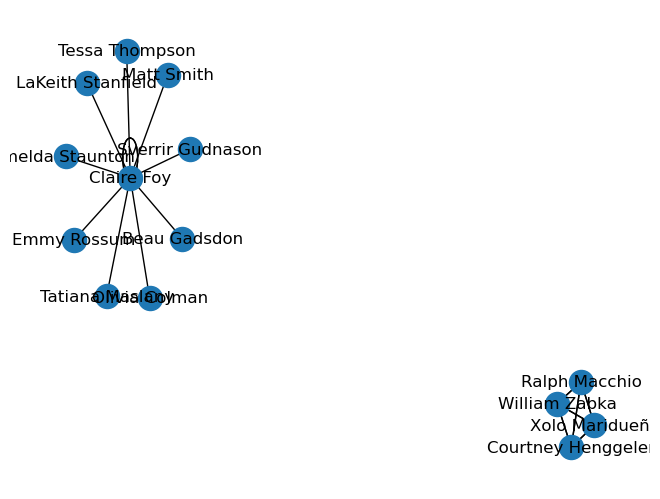

In [57]:
# Media Visualization of Actors with Shared Media

def create_actor_network(actors, df, network, num_nodes):
    # Creating Nodes
    for actor in range(num_nodes):
        network.add_node(actors[actor])

    # Creating Edges
    for i in range(num_nodes):
        for j in tqdm(range(len(df))):
            print(df.loc[j, 'stars'])
            print(actors[i])
            if actors[i] in df.loc[j, 'stars']:
                for actor_2 in df.loc[j, 'stars']:
                    print('hello')
                    if (actor_2 is not actors[i]) and (actor_2 in actors):
                        network.add_edge(actors[i], actor_2)
    return network

network = nx.MultiGraph()
network = create_actor_network(actors, df, network, 5)
nx.draw(network, with_labels=True)

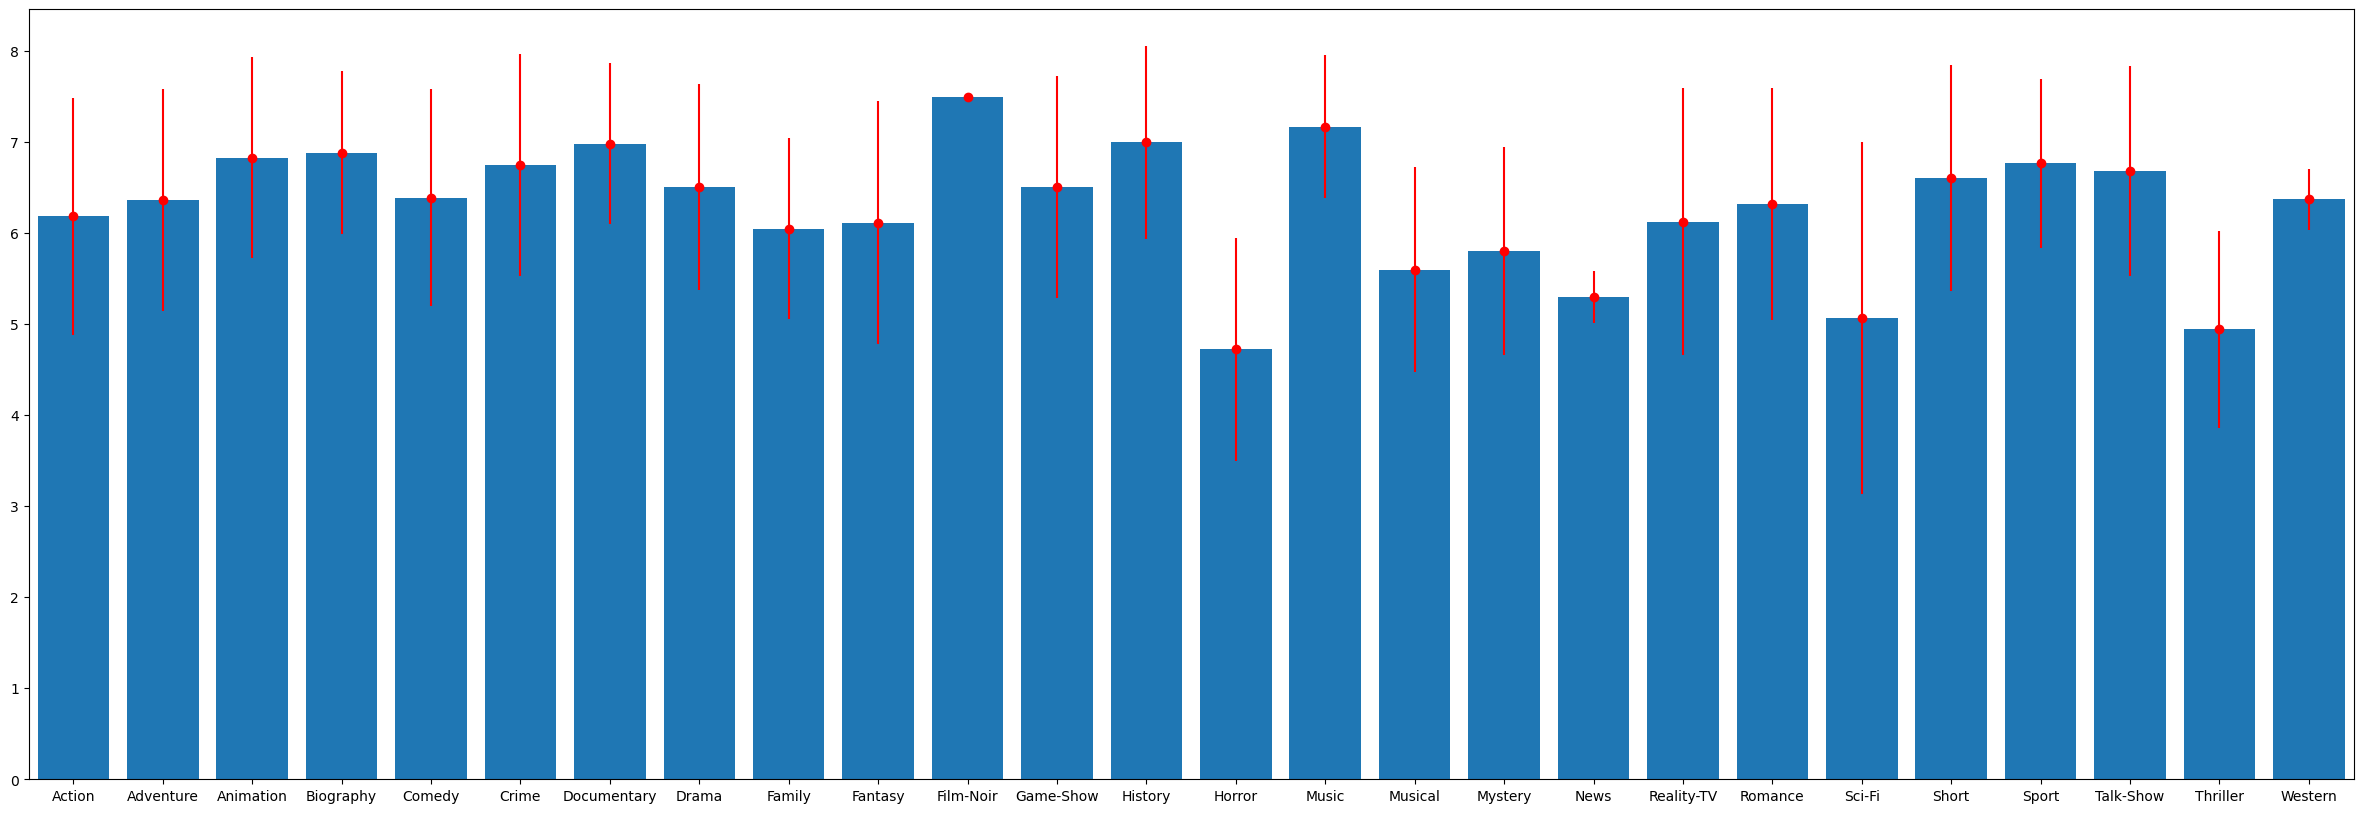

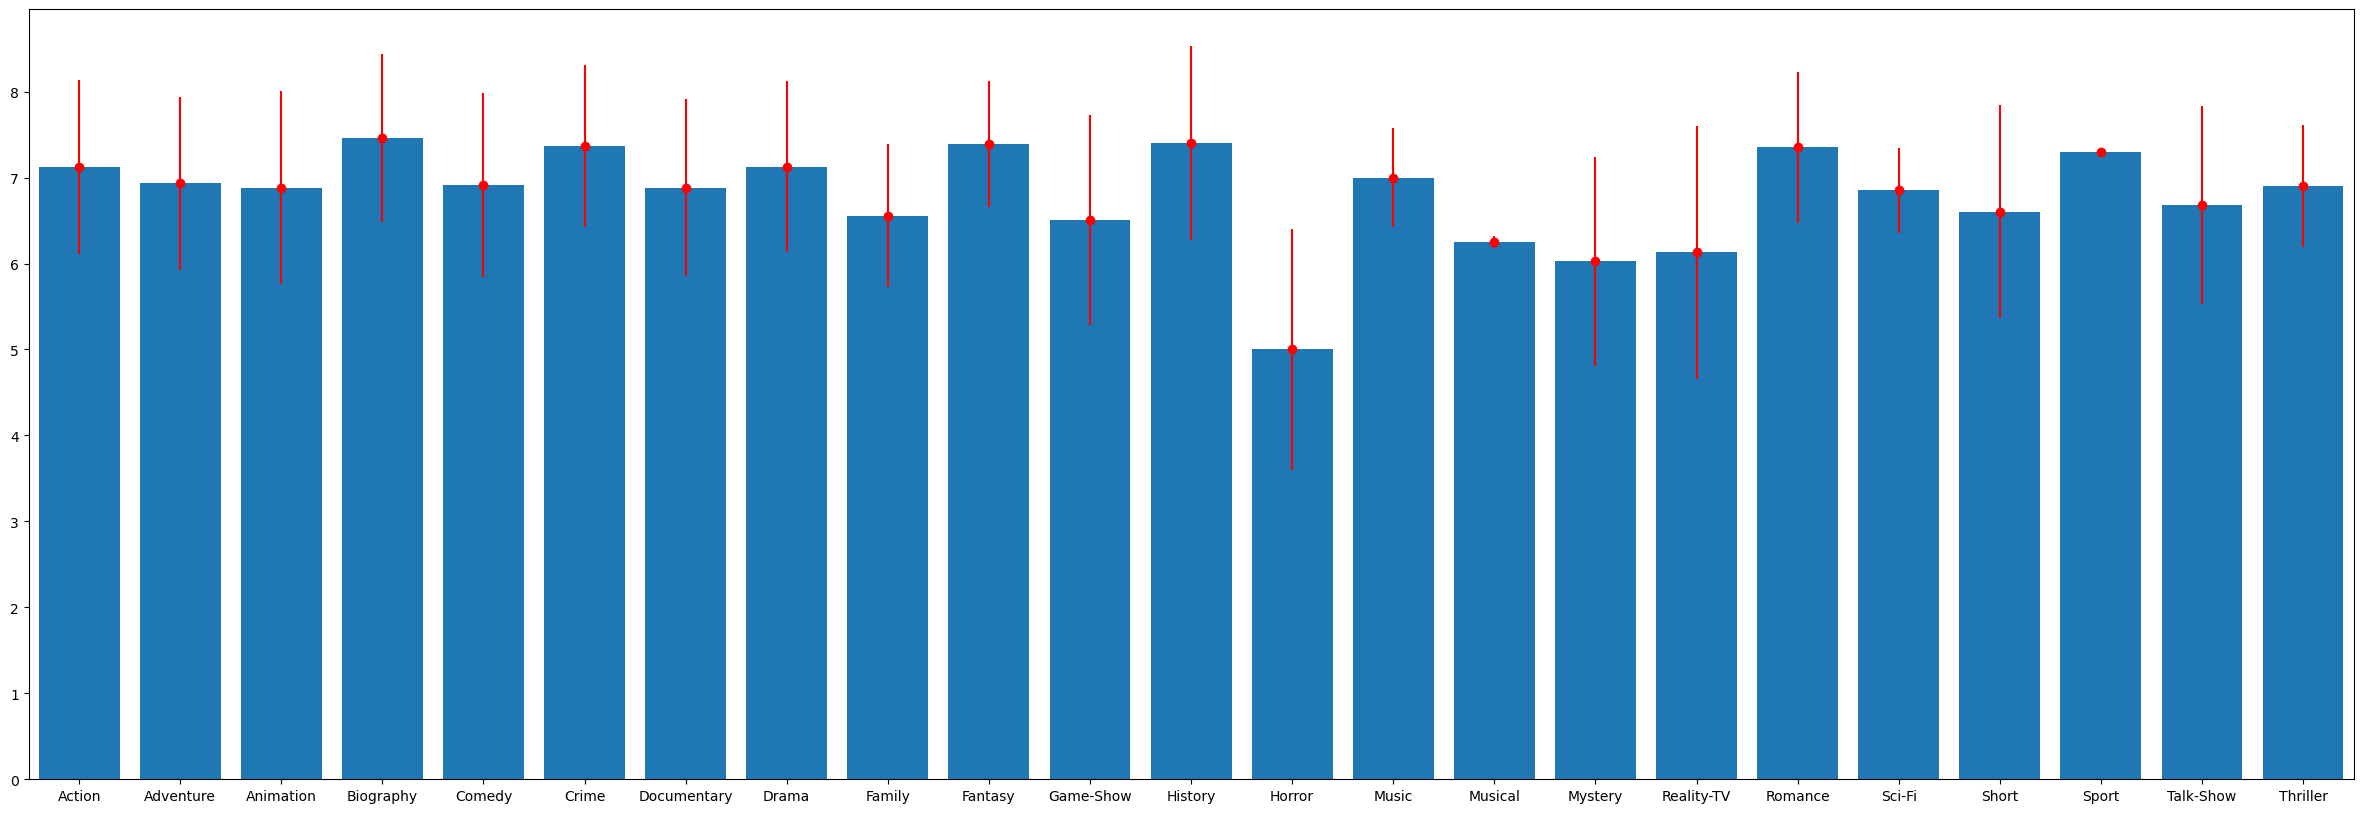

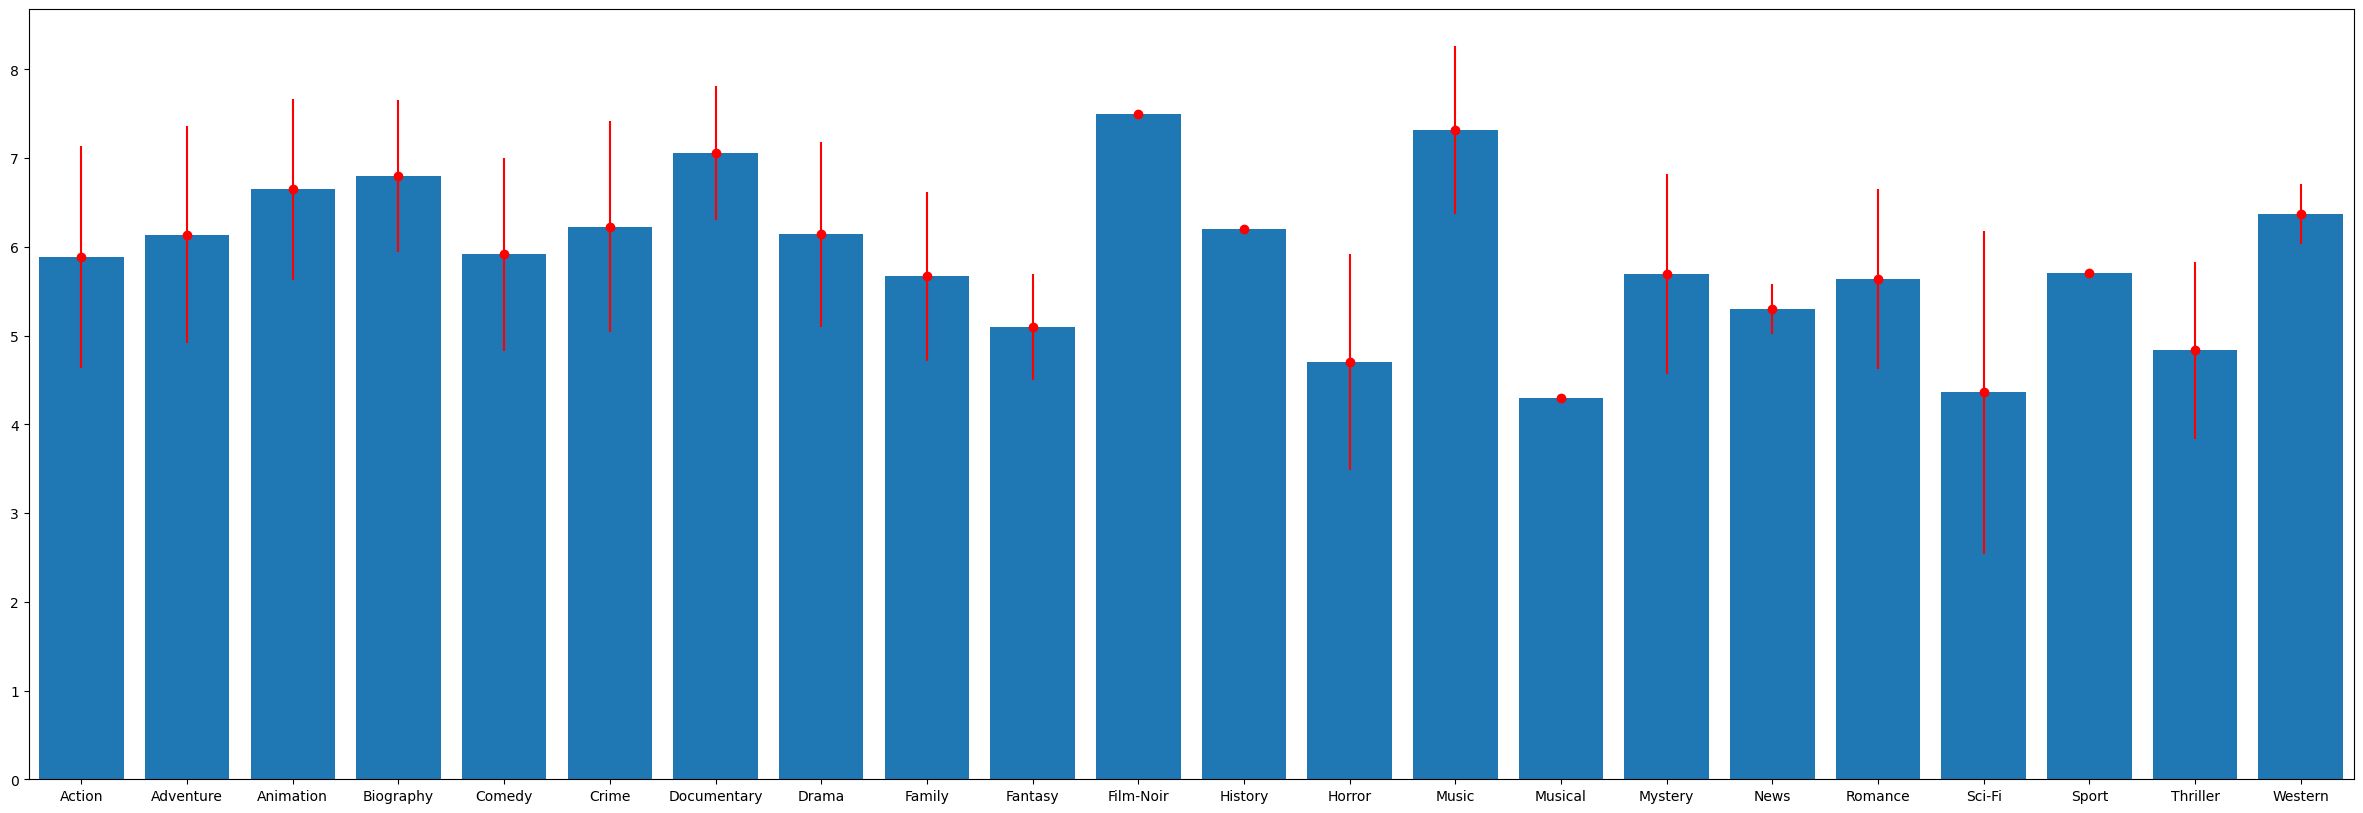

In [55]:

def plot_genre_v_rating(df):
    grouped_df = df.groupby('genre')

    labels = grouped_df.groups.keys()
    means = grouped_df['rating'].mean().tolist()
    stds = grouped_df['rating'].std().tolist()

    plt.figure(figsize=(30, 10))
    plt.bar(x=labels, height=means)
    plt.errorbar(range(len(labels)), means, yerr=stds, fmt="or")
    plt.xlim(-0.5,len(labels)-.5)

    plt.show()

plot_genre_v_rating(df)
plot_genre_v_rating(df.where(df['is_tv'] == True))
plot_genre_v_rating(df.where(df['is_tv'] == False))